In [23]:
import torch 
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import easyocr 
import cv2
from ultralytics import YOLO

In [84]:
import easyocr 
import streamlit as st
import torch
import cv2
from PIL import Image
import io
import numpy as np
import pandas as pd 
from numba import jit,njit,vectorize,cuda,uint32,f8,uint8


In [24]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [25]:
yolo = YOLO('yolov8n.pt')


In [26]:
reader = easyocr.Reader(['en'])


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [87]:
img_path=('Number-plate-580x387.jpg')

In [149]:

def read_plate(img,reader,is_bgr=True): 
        img=cv2.imread(img)
        results = yolo(img)
        results=results[0]
        box=results.boxes
        current_cordinates = [round(x) for x in box.xyxy.flatten().tolist()]
        (x1, y1, x2, y2) = current_cordinates
        plate_img=img[y1:y2, x1:x2]
        gray = cv.cvtColor(plate_img, cv.COLOR_BGR2GRAY)
        blurred = cv.bilateralFilter(gray, 17, 15, 15)
        text = reader.readtext(blurred)
        text = ' '.join([t[1] for t in text])
        img=results.plot()
        fig, ax = plt.subplots(1)
        ax.imshow(img)
        text_position = (75, y2-20)  # Adjust the position as needed 
        ax.text(*text_position, text, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.8)) 
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Show the image with text
        plt.show()



0: 448x640 1 car_lisence_plate, 83.9ms
Speed: 3.0ms preprocess, 83.9ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


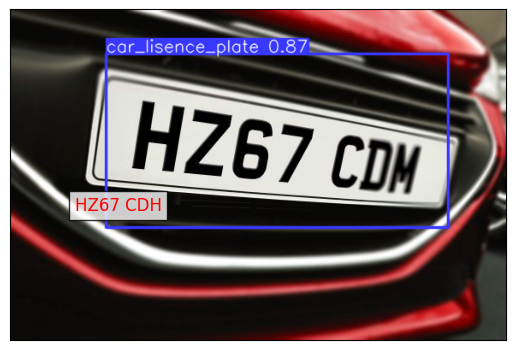

In [150]:
txt = read_plate('Number-plate-580x387.jpg',reader)